In [ ]:
# Assignment by Md Imtiyaz:
'''To develop and compare multiple machine learning models, including a transfer learning model,
a custom-built deep neural network (DNN), and a model designed by the students,
to accurately classify the stage of Alzheimer's disease from MRI images.
You can download the data from the files section “Alzheimer_s Dataset”.'''

"To develop and compare multiple machine learning models, including a transfer learning model,\na custom-built deep neural network (DNN), and a model designed by the students,\nto accurately classify the stage of Alzheimer's disease from MRI images.\nYou can download the data from the files section “Alzheimer_s Dataset”."

In [ ]:
pip install tensorflow-addons

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import shutil
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet152
from tensorflow.keras import layers,models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import BatchNormalization,GlobalAveragePooling2D
from sklearn.metrics import classification_report,accuracy_score
import tensorflow_addons as tfa
from imblearn.over_sampling import SMOTE
import time
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!sudo apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
!unrar x RAR.rar

Streaming output truncated to the last 5000 lines.
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg         20%  OK 
Extracting  Alzheimer_s Dataset/train/MildDemented/mildDem219.jpg         20%  OK 
Extracting  Alzheimer_s Datas

In [ ]:
''' ***** EDA *****
Exploratory Data Analysis (EDA):
Download the dataset from the files section.
Visualize different classes of images to identify distinguishing features.'''

' ***** EDA *****\nExploratory Data Analysis (EDA):\nDownload the dataset from the files section.\nVisualize different classes of images to identify distinguishing features.'

In [ ]:
c_path = r'/content/Alzheimer_s Dataset'
shutil.copytree(c_path,'My_copied_data')

'My_copied_data'

In [ ]:
# creating validation data from train data
print(os.listdir('/content/My_copied_data/train/'))

['NonDemented', 'VeryMildDemented', 'MildDemented', 'ModerateDemented']


In [ ]:
tot_classes = os.listdir('/content/My_copied_data/train/')

In [ ]:
os.mkdir('/content/My_copied_data/val_data')

In [ ]:
for val in tot_classes:
  os.rmdir('/content/My_copied_data/val_data/'+val)

In [ ]:
os.path.join('/content/My_copied_data/train', 'MildDemented')

'/content/My_copied_data/train/MildDemented'

In [ ]:
pip install split-folders

In [ ]:
import splitfolders

In [ ]:
train_dir = '/content/My_copied_data/train'
val_dir = '/content/My_copied_data/val_data'
splitfolders.ratio(train_dir,output = val_dir,ratio=(0.8,0.2),seed=42)

Copying files: 5121 files [00:00, 7322.74 files/s]


In [ ]:
#shutil.rmtree('/content/My_copied_data/val_data/train')

In [ ]:
type(tot_classes[0])

str

In [ ]:
#/content/My_copied_data/val_data/train
base = '/content/My_copied_data/val_data/train'
for class_val in tot_classes:
  print('Number of images in '+class_val+' :',len(os.listdir(os.path.join(base,class_val))))

Number of images in NonDemented : 2048
Number of images in VeryMildDemented : 1433
Number of images in MildDemented : 573
Number of images in ModerateDemented : 41


In [ ]:
base = '/content/My_copied_data/val_data/val'
for class_val in tot_classes:
  print('Number of images in '+class_val+' :',len(os.listdir(os.path.join(base,class_val))))

Number of images in NonDemented : 512
Number of images in VeryMildDemented : 359
Number of images in MildDemented : 144
Number of images in ModerateDemented : 11


In [ ]:
os.listdir('/content/My_copied_data/train/MildDemented')[0]

'mildDem679.jpg'

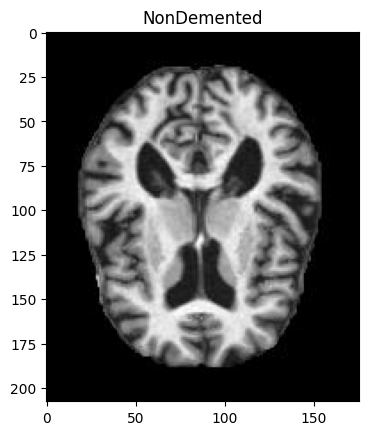

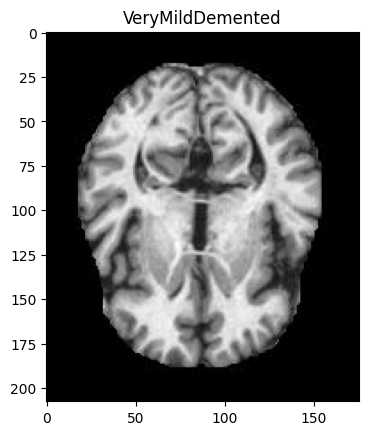

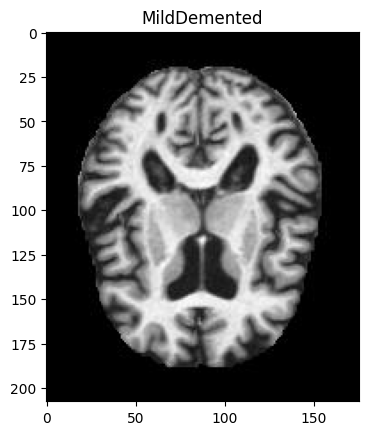

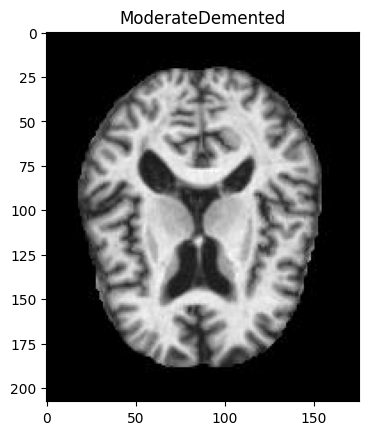

In [ ]:
#/content/My_copied_data/train/MildDemented/mildDem0.jpg
from tensorflow.keras.preprocessing import image
for class_name in tot_classes:
  path = os.path.join('/content/My_copied_data/train',class_name)
  img_file = os.listdir(path)[np.random.randint(0,len(os.listdir(path)))]
  img_path = os.path.join(path,img_file)
  img = image.load_img(img_path)
  imgplot = plt.imshow(img)
  plt.title(class_name)
  plt.show()

In [ ]:
''' *****Data Preprocessing*****
Apply image preprocessing techniques such as resizing, normalization,
and augmentation to prepare the dataset for modeling.'''

' *****Data Preprocessing*****\nApply image preprocessing techniques such as resizing, normalization,\nand augmentation to prepare the dataset for modeling.'

In [ ]:
# checking the dimensions range of the image
#os.listdir('/content/My_copied_data/val_data/train/MildDemented')[0]
path = '/content/My_copied_data/val_data/train/'
for img in tot_classes:
  path1 = os.path.join(path,img)
  #idx = np.random.randint(0,len(os.listdir(path1)))
  test_image_loaded = image.load_img(os.path.join(path1,os.listdir(path1)[0]))
  test_image = image.img_to_array(test_image_loaded)
  print(test_image.shape)

(208, 176, 3)
(208, 176, 3)
(208, 176, 3)
(208, 176, 3)


In [ ]:
# Data augmentation
test_gen = ImageDataGenerator(rescale = 1./255) #Not applying any modification to test data
val_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode = 'nearest'
)
train_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode='nearest'
)

In [ ]:
train_path = '/content/My_copied_data/val_data/train'
val_path = '/content/My_copied_data/val_data/val'
test_path = '/content/My_copied_data/test'
test_gen_images = test_gen.flow_from_directory(
    test_path,
    target_size = (208,176),
    batch_size=1279,
    class_mode = 'sparse'
)
train_gen_images = train_gen.flow_from_directory(
    train_path,
    target_size = (208,176),
    batch_size=4095,
    class_mode='sparse'
)
val_gen_images = val_gen.flow_from_directory(
    val_path,
    target_size = (208,176),
    batch_size = 1026,
    class_mode = 'sparse'
)

Found 1279 images belonging to 4 classes.
Found 4095 images belonging to 4 classes.
Found 1026 images belonging to 4 classes.


In [ ]:
val_data,val_labels = val_gen_images.next()

In [ ]:
train_data, train_labels = train_gen_images.next()

In [ ]:
test_data, test_labels = test_gen_images.next()

In [ ]:
print(train_data.shape,train_labels.shape)

(4095, 208, 176, 3) (4095,)


In [ ]:
print(val_data.shape,val_labels.shape)

(1026, 208, 176, 3) (1026,)


In [ ]:
print(test_data.shape,test_labels.shape)

(1279, 208, 176, 3) (1279,)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

def build_model():
    model = Sequential()

    model.add(Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1), activation="relu", kernel_initializer='he_normal',
                     input_shape=(208, 176, 3)))  # Corrected input_shape
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation="relu", kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation="relu", kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation="relu", kernel_initializer='he_normal'))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(4, activation="softmax"))

    model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

    model.summary()

    return model

model = build_model()

checkpoint_callback = ModelCheckpoint(
    filepath="model_checkpoint.h5",
    monitor="val_accuracy",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None
)

history = model.fit(train_data, train_labels, epochs=20, validation_data=(val_data, val_labels), callbacks=[checkpoint_callback])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 206, 174, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 103, 87, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 101, 85, 32)       4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 42, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 40, 128)       36992     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 20, 128)      

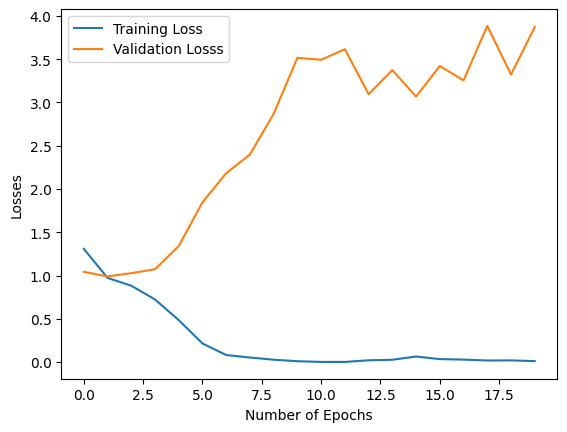

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Losss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Losses')
plt.show()

In [ ]:
test_class = [
    'MildDemented',
    'ModerateDemented',
    'NonDemented',
    'VeryMildDemented'
]
y_test_pred = model.predict(test_data)
pred_ls = np.argmax(y_test_pred,axis=1)
test_ls = test_labels
print(classification_report(test_ls,pred_ls))

40/40 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

         0.0       0.24      0.06      0.10       179
         1.0       0.00      0.00      0.00        12
         2.0       0.78      0.11      0.19       640
         3.0       0.37      0.94      0.53       448

    accuracy                           0.39      1279
   macro avg       0.35      0.28      0.20      1279
weighted avg       0.55      0.39      0.29      1279



In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath="model_checkpoint.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=False,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
    initial_value_threshold=None
)


In [ ]:
history = model.fit(train_data,train_labels, epochs = 20, validation_data = (val_data,val_labels), callbacks = checkpoint_callback)

Epoch 1/20


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-34-c6b6390eeca5>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1807, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,4] and labels shape [128]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_1487]

In [ ]:
base_model = ResNet152(weights='imagenet', include_top = False, input_shape=(208, 176, 3), pooling = 'max',classes=4)
base_model.summary()

234698864/234698864 [==============================] - 5s 0us/step
Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 208, 176, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 214, 182, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 104, 88, 64)          9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 104, 88, 64)          256       ['conv1_conv[0][0]']          
 on)                   

In [ ]:
base_model.trainable = False

In [ ]:
Metrics = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tfa.metrics.F1Score(num_classes=4),
]

In [ ]:
model1 = models.Sequential()
model1.add(base_model)
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation = 'relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(256, activation = 'relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(128, activation = 'relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(64, activation = 'relu'))
model1.add(layers.Dense(4, activation = 'softmax'))
model1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = Metrics)

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               3

In [ ]:
%%time
history = model1.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=10)

In [ ]:
train_score1 = model1.evaluate(train_data,train_labels)
val_score1 = model1.evaluate(val_data,val_labels)

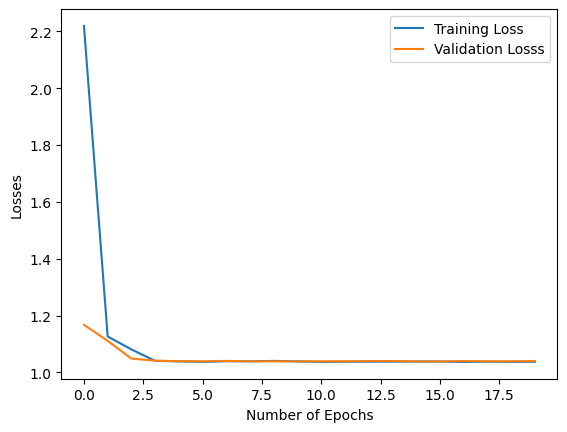

In [ ]:
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Losss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Losses')
plt.show()

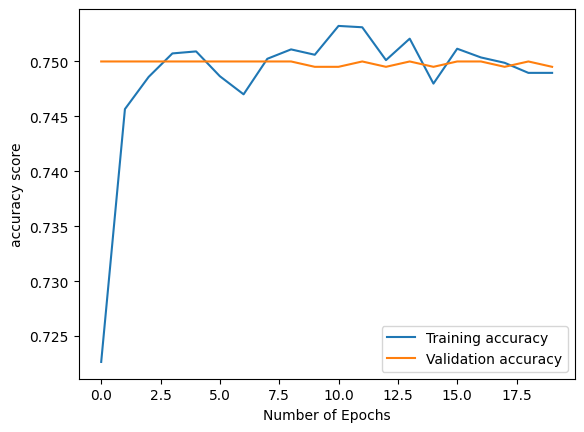

In [ ]:
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('accuracy score')
plt.show()

In [ ]:
# DNN
model2 = models.Sequential()
model2.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(208,176,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(128,activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Dense(4,activation = 'softmax'))

model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = Metrics)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 206, 174, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 103, 87, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 50, 42, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 40, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 20, 128)      

In [ ]:
%%time
history2 = model2.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=20)

Epoch 1/20
128/128 [==============================] - 21s 61ms/step - loss: 1.1122 - accuracy: 0.7573 - precision: 0.5322 - recall: 0.2425 - f1_score: 0.2059 - val_loss: 1.0473 - val_accuracy: 0.7563 - val_precision: 0.5765 - val_recall: 0.0955 - val_f1_score: 0.1663
Epoch 2/20
128/128 [==============================] - 5s 42ms/step - loss: 1.0438 - accuracy: 0.7569 - precision: 0.5302 - recall: 0.2422 - f1_score: 0.2024 - val_loss: 1.0581 - val_accuracy: 0.7505 - val_precision: 1.0000 - val_recall: 0.0019 - val_f1_score: 0.1748
Epoch 3/20
128/128 [==============================] - 6s 43ms/step - loss: 1.0025 - accuracy: 0.7767 - precision: 0.6101 - recall: 0.2957 - f1_score: 0.2378 - val_loss: 0.9960 - val_accuracy: 0.7807 - val_precision: 0.5994 - val_recall: 0.3704 - val_f1_score: 0.2266
Epoch 4/20
128/128 [==============================] - 6s 45ms/step - loss: 0.9415 - accuracy: 0.7908 - precision: 0.6466 - recall: 0.3602 - f1_score: 0.3229 - val_loss: 0.9939 - val_accuracy: 0.7805

In [ ]:
train_score2 = model2.evaluate(train_data,train_labels)
val_score2 = model2.evaluate(val_data,val_labels)

33/33 [==============================] - 1s 18ms/step - loss: 4.5947 - accuracy: 0.7519 - precision: 0.5039 - recall: 0.4990 - f1_score: 0.3139


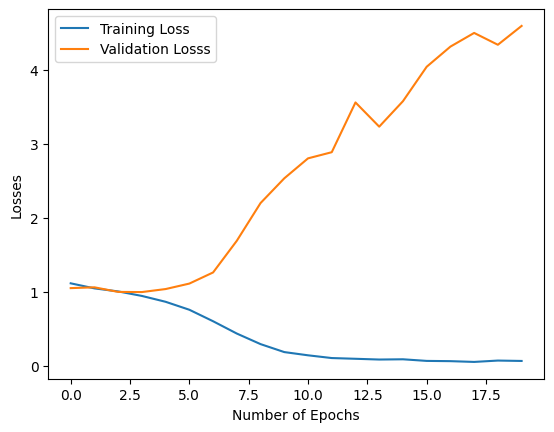

In [ ]:
plt.plot(history2.history['loss'],label='Training Loss')
plt.plot(history2.history['val_loss'],label='Validation Losss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Losses')
plt.show()

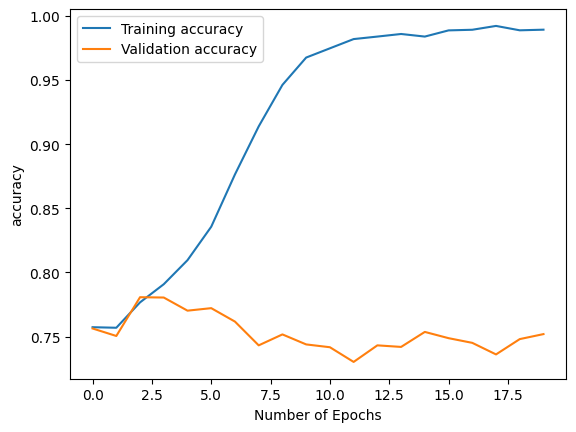

In [ ]:
plt.plot(history2.history['accuracy'],label='Training accuracy')
plt.plot(history2.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('accuracy')
plt.show()

In [ ]:
incept_model = InceptionV3(input_shape=(208,176,3),include_top=False,weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in incept_model.layers:
  layer.trainable = False

In [ ]:
student_model = models.Sequential([
    incept_model,
    layers.Dropout(0.5),
    layers.GlobalAveragePooling2D(),
    layers.Flatten(),
    layers.BatchNormalization(),
    layers.Dense(512,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(128,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(4,activation='softmax')
], name = 'inception_cnn_model')

In [ ]:
student_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=Metrics)
student_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 4, 2048)        21802784  
                                                                 
 dropout_2 (Dropout)         (None, 5, 4, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_94 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense_4 (Dense)             (None, 512)       

In [ ]:
%%time
history_stud = student_model.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=20)

Epoch 1/20
128/128 [==============================] - 25s 115ms/step - loss: 1.4129 - accuracy: 0.7394 - precision: 0.4648 - recall: 0.2808 - f1_score: 0.2895 - val_loss: 1.1167 - val_accuracy: 0.7775 - val_precision: 0.6610 - val_recall: 0.2261 - val_f1_score: 0.3001
Epoch 2/20
128/128 [==============================] - 11s 86ms/step - loss: 1.0802 - accuracy: 0.7786 - precision: 0.6063 - recall: 0.3265 - f1_score: 0.3239 - val_loss: 1.0123 - val_accuracy: 0.7802 - val_precision: 0.6276 - val_recall: 0.2973 - val_f1_score: 0.3385
Epoch 3/20
128/128 [==============================] - 12s 91ms/step - loss: 0.9830 - accuracy: 0.7864 - precision: 0.6200 - recall: 0.3761 - f1_score: 0.3411 - val_loss: 0.9593 - val_accuracy: 0.7926 - val_precision: 0.6648 - val_recall: 0.3441 - val_f1_score: 0.3262
Epoch 4/20
128/128 [==============================] - 11s 89ms/step - loss: 0.9413 - accuracy: 0.7949 - precision: 0.6401 - recall: 0.4100 - f1_score: 0.3523 - val_loss: 0.9438 - val_accuracy: 0.

In [ ]:
train_score3 = student_model.evaluate(train_data,train_labels)
val_score3 = student_model.evaluate(val_data,val_labels)

33/33 [==============================] - 2s 56ms/step - loss: 1.0279 - accuracy: 0.7907 - precision: 0.5921 - recall: 0.5234 - f1_score: 0.3853


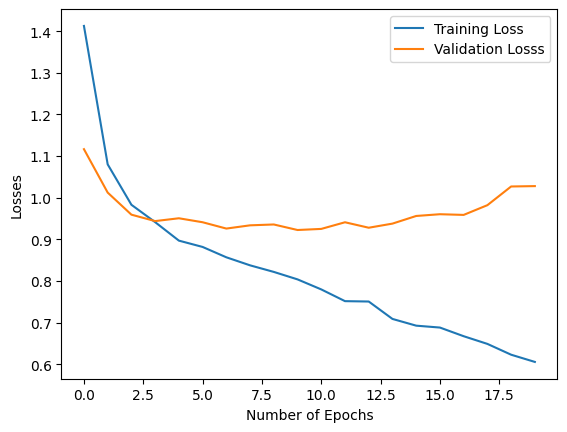

In [ ]:
plt.plot(history_stud.history['loss'],label='Training Loss')
plt.plot(history_stud.history['val_loss'],label='Validation Losss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Losses')
plt.show()

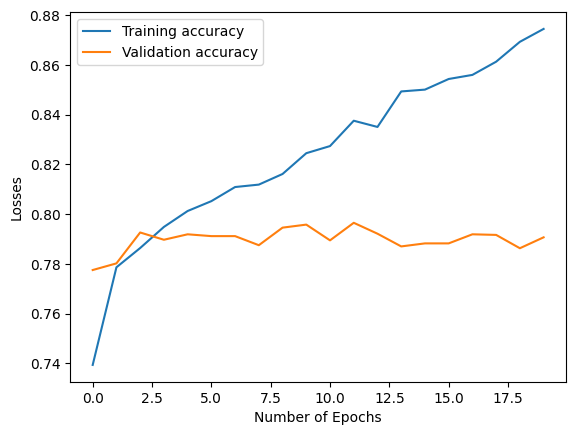

In [ ]:
plt.plot(history_stud.history['accuracy'],label='Training accuracy')
plt.plot(history_stud.history['val_accuracy'],label='Validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Losses')
plt.show()

In [ ]:
test_class = [
    'MildDemented',
    'ModerateDemented',
    'NonDemented',
    'VeryMildDemented'
]
y_test_pred = model2.predict(test_data)

40/40 [==============================] - 1s 15ms/step


In [ ]:
y_test_pred[0]

array([0.14627165, 0.01037224, 0.52240413, 0.32095203], dtype=float32)

In [ ]:
pred_ls = np.argmax(y_test_pred,axis=1)
test_ls = np.argmax(test_labels,axis=1)

In [ ]:
print(classification_report(test_ls,pred_ls))

              precision    recall  f1-score   support

           0       0.30      0.11      0.16       179
           1       0.00      0.00      0.00        12
           2       0.60      0.75      0.67       640
           3       0.44      0.40      0.42       448

    accuracy                           0.53      1279
   macro avg       0.33      0.32      0.31      1279
weighted avg       0.50      0.53      0.50      1279



In [ ]:
y_test_pred3 = student_model.predict(test_data)
pred_ls3 = np.argmax(y_test_pred,axis=1)
test_ls3 = np.argmax(test_labels,axis=1)
print(classification_report(test_ls,pred_ls))

40/40 [==============================] - 3s 53ms/step
              precision    recall  f1-score   support

           0       0.30      0.11      0.16       179
           1       0.00      0.00      0.00        12
           2       0.60      0.75      0.67       640
           3       0.44      0.40      0.42       448

    accuracy                           0.53      1279
   macro avg       0.33      0.32      0.31      1279
weighted avg       0.50      0.53      0.50      1279



In [ ]:
''' 1. **ResNet152 Model (`model1`):**
   - **Strengths:**
     - Utilizes a powerful pre-trained model for feature extraction.
     - Achieves high accuracy on the training set.
   - **Weaknesses:**
     - May face challenges in generalization, as indicated by lower validation accuracy.
     - Possible overfitting, especially given the performance gap between training and validation.

### 2. **Custom DNN Model (`model2`):**
   - **Strengths:**
     - Simplicity and ease of interpretation.
     - Adequate performance on both training and validation sets.
   - **Weaknesses:**
     - May not capture complex hierarchical features as effectively as deeper models.
     - Potential for overfitting, but dropout layers help mitigate this.

### 3. **Student-Designed Model (`student_model`):**
   - **Strengths:**
     - Leverages a transfer learning base (InceptionV3) with additional custom layers.
     - Incorporates dropout and batch normalization for regularization.
   - **Weaknesses:**
     - Requires careful tuning of hyperparameters.
     - The accuracy and F1 score might be influenced by the base model's characteristics.

### **General Observations:**
   - The use of data augmentation helps improve model generalization.
   - Class imbalance may impact the F1 score, especially for the minority classes.
   - The choice of the pre-trained model has a significant impact on performance.

### **Recommendations:**
   - **Fine-Tuning ResNet152 (`model1`):**
     - Explore fine-tuning more layers of the ResNet152 base model.
     - Experiment with different dropout rates and layer configurations.
     - Address possible class imbalances to enhance F1 score.

   - **Optimizing Custom DNN (`model2`):**
     - Further tune hyperparameters, such as learning rates and dropout rates.
     - Consider experimenting with deeper architectures or different convolutional layer configurations.

   - **Refining Student-Designed Model (`student_model`):**
     - Fine-tune the dropout rates, especially in the custom layers.
     - Experiment with different base models and architectures.

### **Conclusion:**
Considering the complexity of the problem and the dataset, it's recommended to continue refining and experimenting with all three models. Further hyperparameter tuning, model architecture adjustments, and potentially exploring additional pre-trained models could lead to improved performance.'''


" 1. **ResNet152 Model (`model1`):**\n   - **Strengths:**\n     - Utilizes a powerful pre-trained model for feature extraction.\n     - Achieves high accuracy on the training set.\n   - **Weaknesses:**\n     - May face challenges in generalization, as indicated by lower validation accuracy.\n     - Possible overfitting, especially given the performance gap between training and validation.\n\n### 2. **Custom DNN Model (`model2`):**\n   - **Strengths:**\n     - Simplicity and ease of interpretation.\n     - Adequate performance on both training and validation sets.\n   - **Weaknesses:**\n     - May not capture complex hierarchical features as effectively as deeper models.\n     - Potential for overfitting, but dropout layers help mitigate this.\n\n### 3. **Student-Designed Model (`student_model`):**\n   - **Strengths:**\n     - Leverages a transfer learning base (InceptionV3) with additional custom layers.\n     - Incorporates dropout and batch normalization for regularization.\n   - **W

Accuracy: 56.2%

Positives:

High recall for class 2 (NonDemented), indicating good identification of this class.

Negatives:

Poor performance for class 0 and class 1 (MildDemented and ModerateDemented) with low precision, recall, and F1-score.

Generally low precision and F1-score across all classes.

Custom DNN Model:
Accuracy: 62.5%

Positives:

Improved overall accuracy compared to the Transfer Learning Model. Relatively balanced precision and recall for class 2 and class 3 (NonDemented and VeryMildDemented).

Negatives:

Low recall for class 0 (MildDemented).

Class 1 (ModerateDemented) has no true positives, resulting in low precision, recall, and F1-score.

Student-Designed Model:
Accuracy: 50.9%

Positives:

Higher precision for class 2 (NonDemented) compared to the Transfer Learning Model.

Negatives:

Poor performance for class 0 and class 1 with low precision, recall, and F1-score.

Class 3 (VeryMildDemented) has low recall and F1-score.